# HOMEWORK 3

#### Trabalho realizado por:
- António Ramos, 101193, ajframos@ua.pt, MEI
- Emanuel Ferreira, 104560, emanuels.ferreira@ua.pt, MEI
- Rafael Sá, 104552, rafael.sa@ua.pt, MEI

#### Grupo 15


# Funções Discriminantes Lineares e KNN
## Avaliação Gráfica

In [1]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import itertools

In [2]:
#Toy examples illustration. Verify if package "mlxten"
from mlxtend.plotting import plot_decision_regions


# Toy Data

Para testar os classificadores foram utilizados dados gerados com 2 características. <br>
Os 3 tipo de dados gerados são:
 - Blobs
 - Moons
 - Circles

Para cada tipo de dados foram geradas 100 amostras.

In [3]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=100, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.4)

labels = ['Blobs', 'Moons', 'Circles']

In [4]:
print(np.unique(y_blobs))

[0 1]


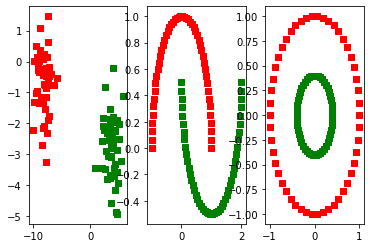

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Preparação dos Dados
## Divisão entre dados de treino e dados de teste

In [6]:
from sklearn.model_selection import train_test_split

X_blobs_train, X_blobs_test, y_blobs_train, y_blobs_test = train_test_split(X_blobs, y_blobs, test_size=0.3, random_state=0)
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, y_moon, test_size=0.3, random_state=0)
X_cir_train, X_cir_test, y_cir_train, y_cir_test = train_test_split(X_cir, y_cir, test_size=0.3, random_state=0)

Os dados gerados foram divididos entre dados de treino, e dados de teste. <br>
A divisão foi feita atribuindo 30% dos dados para os dados de teste.

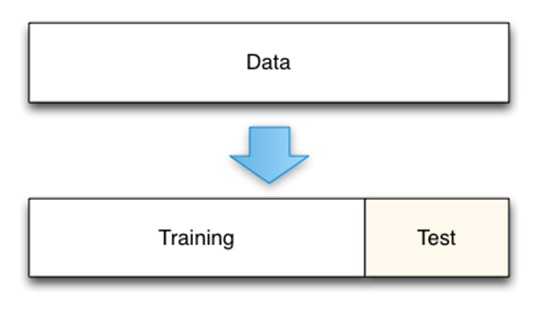

Os dados de treino são os que são utilizados para treinar o classificador. <br>
Os dados de teste são utilizados para avaliar de forma imparcial o classificador, após ser treinado com os dados de treino. Este conjunto de dados de teste contém dados novos, selecionados cuidadosamente para abranger os vários cenários possíveis, que não foram utilizados para treinar o classificador, 

## Normalização dos Dados

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_blobs_train_std = sc.fit_transform(X_blobs_train)
X_blobs_test_std = sc.transform(X_blobs_test)
X_moon_train_std = sc.fit_transform(X_moon_train)
X_moon_test_std = sc.transform(X_moon_test)
X_cir_train_std = sc.fit_transform(X_cir_train)
X_cir_test_std = sc.transform(X_cir_test)

Antes de treinar os classificadores, foi feita a normalização dos dados para uma escala unitária (média = 0 e variância = 1) de forma a otimizar a precisão dos classificadores.

## Treino com Classificadores Discriminantes Lineares

### Perceptrão

    Na criação de um perceptrão, de entre muitos parametros, 2 bastantes importantes são:
        - max_iter: Indica o número máximo de iterações sobre todos os dados do modelo. O processo de treino finaliza quando todos os dados de treino são treinados com sucesso OU quando é atingido este número de iterações.
        - eta0: É a learning rate, isto é, define o tamanho dos passos a que o perceptrão aprende. Números maiores fazem com que a alteração dos parâmetros em caso de erro de classificação sejam muito maiores. Valores grandes podem gerar over-fitting, Valores muito pequenos podem exigir muitas iterações para treinar com sucesso.

In [8]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

ppn

Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

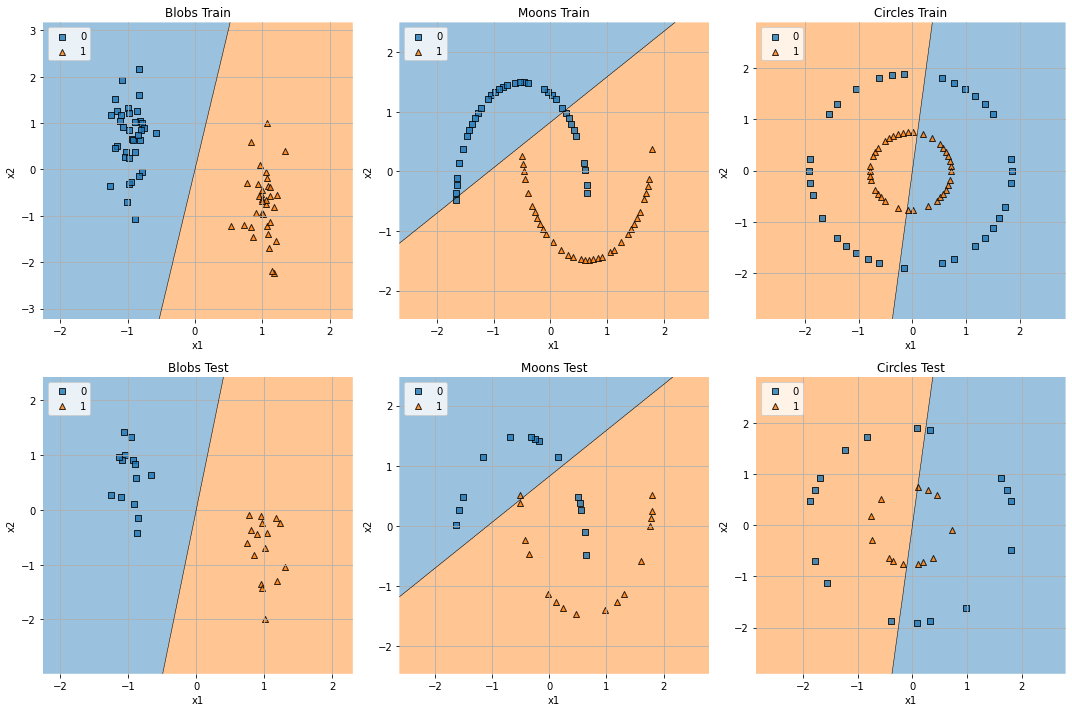

In [9]:
from sklearn.preprocessing import StandardScaler

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,10))
ppnWeigths = []
ppnBias = []
for data, lab, grd in \
 zip([[X_blobs_train_std,y_blobs_train,X_blobs_test_std,y_blobs_test],[X_moon_train_std,y_moon_train,X_moon_test_std,y_moon_test],[X_cir_train_std,y_cir_train,X_cir_test_std,y_cir_test]], labels, [0, 1, 2]):
    #Learning
    ppn.fit(data[0], data[1])
    # how it learns
    ax = plt.subplot(gs[0, grd])
    fig = plot_decision_regions(X=data[0], y=data[1], clf=ppn)
    plt.title(lab + " Train")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    
    ppnWeigths.append(ppn.coef_)
    ppnBias.append(ppn.intercept_)
    
    # with test data
    ax = plt.subplot(gs[1, grd])
    fig = plot_decision_regions(X=data[2], y=data[3], clf=ppn)
    plt.title(lab + " Test")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plt.show()

In [10]:
print('number of iteration', ppn.n_iter_)
print('weights', ppn.coef_)
print('bias',ppn.intercept_)

number of iteration 20
weights [[-0.16972116  0.02178396]]
bias [-2.77555756e-17]


## Gradient based algorithms
### ADALINE, logistic regression. 

In [11]:
from sklearn.linear_model import SGDClassifier
# With loss="log" a logistic regression is be appllied.  with loss="squared_loss" is least squares.

gd=SGDClassifier(loss="log", max_iter=20)

gd


SGDClassifier(loss='log', max_iter=20)

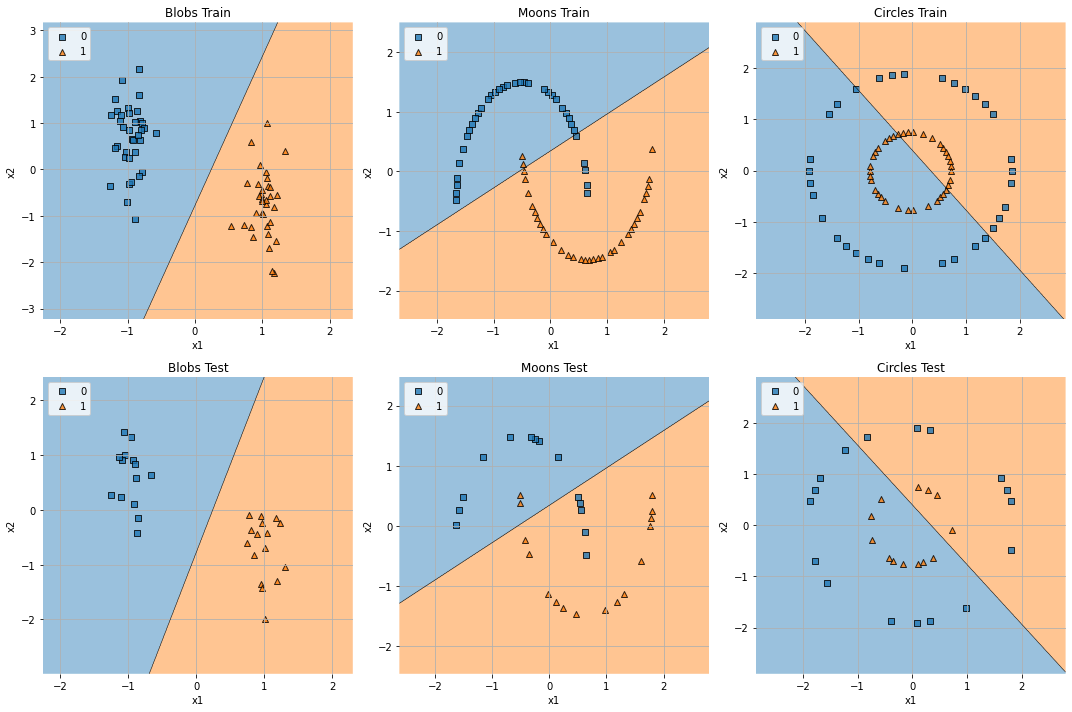

In [12]:
fig = plt.figure(figsize=(15,10))
gdWeigths= []
gdBias= []
for data, lab, grd in zip([[X_blobs_train_std,y_blobs_train,X_blobs_test_std,y_blobs_test],[X_moon_train_std,y_moon_train,X_moon_test_std,y_moon_test],[X_cir_train_std,y_cir_train,X_cir_test_std,y_cir_test]], labels, [0, 1, 2]):
    #Learning
    gd.fit(data[0], data[1])
    # how it learns
    ax = plt.subplot(gs[0, grd])
    fig = plot_decision_regions(X=data[0], y=data[1], clf=gd)
    plt.title(lab + " Train")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    
    gdWeigths.append(gd.coef_)
    gdBias.append(gd.intercept_)
    
    # with test data
    ax = plt.subplot(gs[1, grd])
    fig = plot_decision_regions(X=data[2], y=data[3], clf=gd)
    plt.title(lab + " Test")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plt.show()


In [13]:
#Parameters
print('number of iteration', gd.n_iter_)
print('weights', gd.coef_)
print('bias',gd.intercept_)

number of iteration 18
weights [[4.23504974 3.62447603]]
bias [-1.43836093]


### Conclusões - Perceptrão e Adaline

    Perceptrão e ADALINE são classificadores lineares para classificações binárias. Isto quer dizer que a classificação é feita com base numa reta que separa as 2 classes (ω1, ω2), cada lado da reta correspondendo a uma delas.
    
    Sendo retas, a equação que é chamada de decision boundary será do tipo g(x)=w^t*x+b em que w ∈ R^d e b ∈ R (w é o vetor de pesos e b o bias). O sinal do resultado da equação indica em que lado o ponto está, ou seja, a que classe pertence. 
    
    Para se fazer a classificação corretamente é necessário que a reta separe os pontos de ambas as classes e para isso os parâmetros w e b têm que ser ajustados de forma a acontecer isso. O processo de ajustar estes parâmetros é o que se chama de learning.
    
    g(x) = w^t*x + b ⇒ { g(x) > 0 x ∈ ω1
                        g(x) < 0 x ∈ ω2}

#### Cálculo da decision boundary equation

    Partindo de g(x) = w^t*x + b e tendo o vetor de weights e bias resultantes do treino, calcula-se o dot product de w.x .
    Neste caso específico trata-se de um problema bi-dimensional (com duas características), ou seja, as entradas e pesos serão de dimensão 2. Isto quer dizer que a equação final será:
                        g(x) = w1x1 + w2x2 + b

#### Equações de decisão do Perceptrão

In [14]:
for w, b in zip(ppnWeigths, ppnBias):
    print("g(x) = ", round(w[0][0], 3), "x1 + ", round(w[0][1], 3), "x2 + ", round(b[0],3))

g(x) =  0.219 x1 +  -0.036 x2 +  0.0
g(x) =  0.185 x1 +  -0.243 x2 +  0.2
g(x) =  -0.17 x1 +  0.022 x2 +  -0.0


#### Equações de decisão do Adaline

In [15]:
for w, b in zip(gdWeigths, gdBias):
    print("g(x) = ", round(w[0][0], 3), "x1 + ", round(w[0][1], 3), "x2 + ", round(b[0],3))

g(x) =  10.517 x1 +  -3.276 x2 +  -2.543
g(x) =  6.061 x1 +  -9.772 x2 +  3.342
g(x) =  4.235 x1 +  3.624 x2 +  -1.438


#### Treino

    Como a separação de ambas as classes é feita com uma reta, usando este tipo de classificadores é apenas possivel fazer um treino de todos os dados quando os dados são linearmente separáveis.
    
    O sucesso de treino destes conjuntos de dados foi semelhante em ambos os classificadores. O conjunto de dados "Blobs" foi treinado na totalidade pelos classificadores. Nos conjuntos "Moons" e "Circles" não foi possivel aprender todos os dados porque não são linearmente separáveis
    
    A diferença do Perceptrão e do Adaline está na lógica de treino. A algoritmo de treino do Perceptrão é o seguinte:
        - Percorrer todos os dados de treino
        - Utilizar a função de decisão em cada um dos dados
        - Se a função classificar corretamente avança-se para os dados seguintes
        - Se a função não classificar corretamente é necessário um ajuste nos parametros (w e b) para os dados serem
        classificados corretamente   
    No caso do Adaline os parâmetros são atualizados em todos os dados de treino consoante o erro (diferença entre o output e o target).


## KNN: K-Nearest Neighbors

O KNN é um "lazy classifier", ou seja, em vez de generalizar e aprender uma função discriminativa através dos dados de treino, ele "memoriza" o conjunto de dados de treino. <br>

### Análise da variação dos parâmetros K e Weights

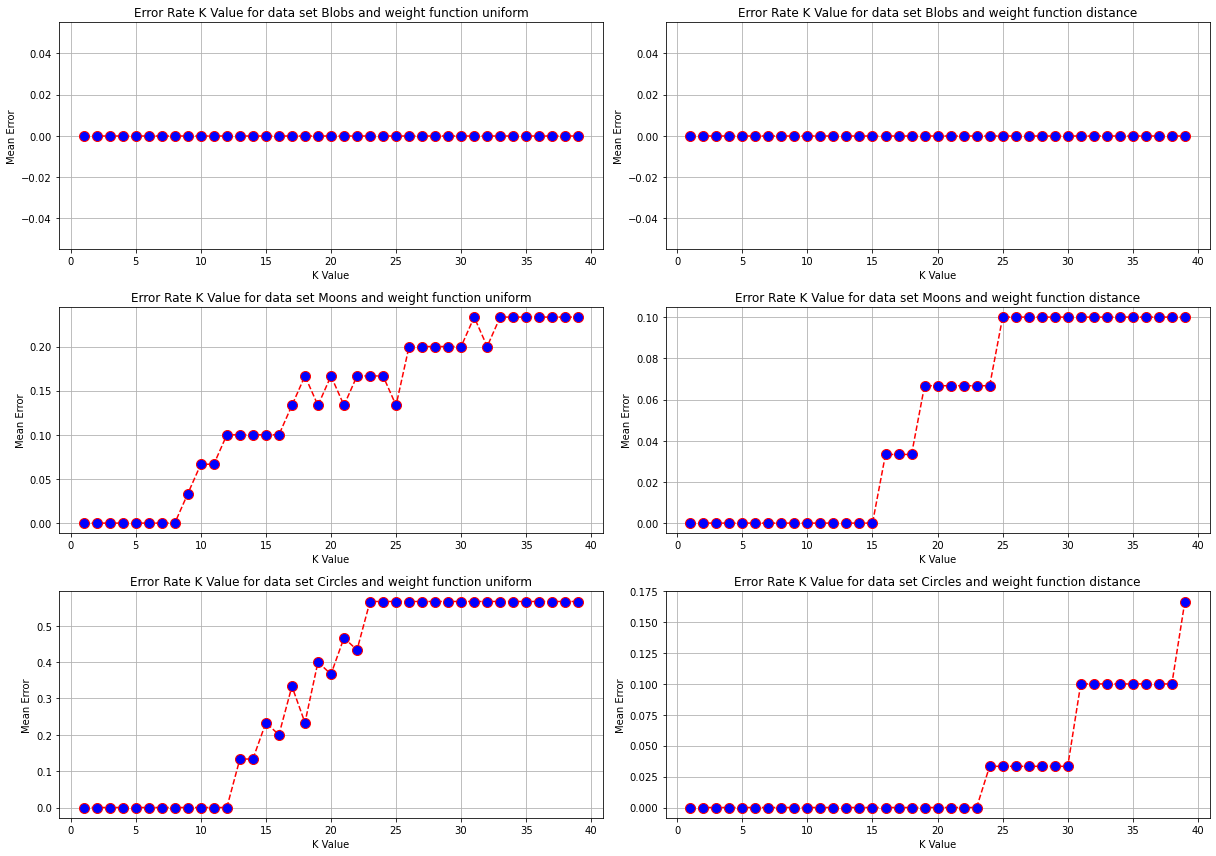

In [16]:
from sklearn import neighbors

gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(17, 12))

for data, lab, grd in zip([[X_blobs_train_std,y_blobs_train,X_blobs_test_std,y_blobs_test],[X_moon_train_std,y_moon_train,X_moon_test_std,y_moon_test],[X_cir_train_std,y_cir_train,X_cir_test_std,y_cir_test]], labels, [0, 1, 2]):
    for weight, gr in zip(['uniform', 'distance'], [0,1]):
        error = []
        # Calculating error for K values between 1 and 40
        for i in range(1, 40):
            knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weight)
            knn.fit(data[0], data[1])
            pred_i = knn.predict(data[2])
            error.append(np.mean(pred_i != data[3]))

        ax = plt.subplot(gs[grd, gr])
        fig = plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value for data set ' + lab + " and weight function " + weight)
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        plt.grid()
        plt.tight_layout()
    
plt.show()

Os gráficos apresentam o erro médio da classificação consoante a variação do parâmetro K, para os dois tipos de "weight function" e para os três data sets.
<br><br>
Através de uma análise aos gráficos, é possível verificar que a variação dos parâmetros não revela nenhuma alteração no data set "blobs", visto que o erro médio é sempre igual a 0. <br>
As conclusões mais interessantes são tiradas da análise aos gráficos para os data sets "moons" e "circles". <br>
É possível verificar que a <b>"weight function" distance</b> apresenta um menor erro médio, chegando mesmo a eliminar o erro no caso do data set "circles". A "weight function" distance atribui uma maior influência aos vizinhos que estão mais próximos do que aos vizinhos mais afastados, ao contrário da "weight function" uniform que atribui o mesmo peso a todos os vizinhos independentemente da sua distância.
<br><br>
Em relação à variação do número de vizinhos, o parâmetro K, é possível verificar que, de um modo geral, para valores muito grandes de K, maior será o erro médio da classificação, pois existirá mais ruído e já não se vai cingir apenas aos vizinhos "mais próximos". Por outro lado, o valor do K também não deve ser muito pequeno, senão maior será o risco de existir uma má classificação. <br>
Posto isto, conclui-se que deve existir um equílibro no valor do K, e uma das formas de obter uma recomendação para o número de vizinhos é através da raiz quadrada do número de elementos dos dados de treino. Neste caso, uma vez que o conjunto de dados de treino é composto por 70% do total de dados, então o número de vizinhos recomendado é aproximadamente 8,4. Sendo assim, definiu-se o valor do parâmetro k como <b>9 vizinhos</b>, sendo um número ímpar para evitar possíveis empates na classificação.

### Treino e Teste

In [17]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9, algorithm='auto', weights='distance')

print(knn)

#Parameters
print('number of neighbors', knn.n_neighbors)
print('weight function', knn.weights)
print('algorithm',knn.algorithm)

KNeighborsClassifier(n_neighbors=9, weights='distance')
number of neighbors 9
weight function distance
algorithm auto


Feita a análise da variação dos parâmetros, definiu-se que o número de vizinhos seria 9, e seria utilizada a weight function distance. <br>
Em relação ao algoritmo foi atribuído o valor auto, já que assim vai tentar decidir o algoritmo mais apropriado com base nos valores passados para treinar o classificador.

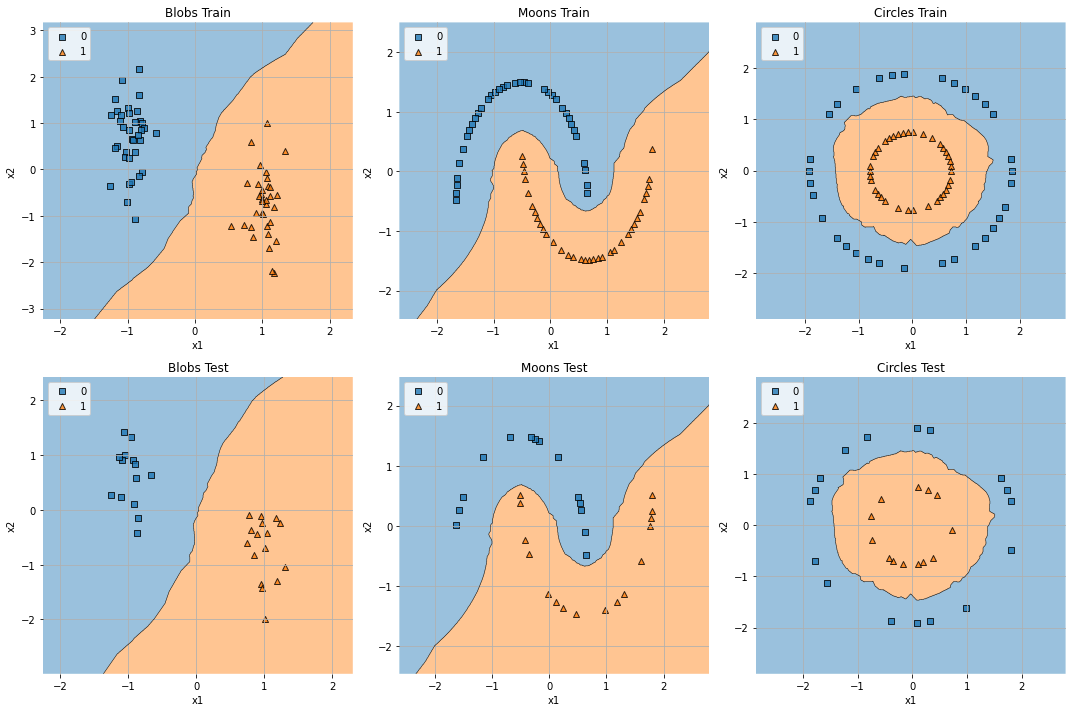

In [18]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))

for data, lab, grd in zip([[X_blobs_train_std,y_blobs_train,X_blobs_test_std,y_blobs_test],[X_moon_train_std,y_moon_train,X_moon_test_std,y_moon_test],[X_cir_train_std,y_cir_train,X_cir_test_std,y_cir_test]], labels, [0, 1, 2]):
    #Learning
    knn.fit(data[0], data[1])
    # how it learns
    ax = plt.subplot(gs[0, grd])
    fig = plot_decision_regions(X=data[0], y=data[1], clf=knn)
    plt.title(lab + " Train")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    # with test data
    ax = plt.subplot(gs[1, grd])
    fig = plot_decision_regions(X=data[2], y=data[3], clf=knn)
    plt.title(lab + " Test")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    

plt.show()


No KNN não existe propriamente uma fase de treino, ou seja, sempre que se quer fazer uma nova previsão o KNN vai pesquisar os vizinhos mais próximos no conjunto de dados de treino. Isto resulta numa fase de testes muito mais demorada em relação aos outros classificadores já analisados, que demoram mais tempo na fase de treino e são muito mais rápidos na fase de testes.<br>
Fazendo uma análise aos gráficos dos três data sets, é possível verificar que a superfície de decisão classifica corretamente os dados de treino, não existindo nenhum erro de classificação.